In [1]:
!wget http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/apple.jpg
!wget http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/orange.jpg

--2021-06-07 17:46:26--  http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/apple.jpg
Resolving pages.cs.wisc.edu (pages.cs.wisc.edu)... 128.105.7.26
Connecting to pages.cs.wisc.edu (pages.cs.wisc.edu)|128.105.7.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51705 (50K) [image/jpeg]
Saving to: ‘apple.jpg’

apple.jpg           100%[===================>]  50.49K  --.-KB/s    in 0.07s   

2021-06-07 17:46:27 (701 KB/s) - ‘apple.jpg’ saved [51705/51705]

--2021-06-07 17:46:27--  http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/orange.jpg
Resolving pages.cs.wisc.edu (pages.cs.wisc.edu)... 128.105.7.26
Connecting to pages.cs.wisc.edu (pages.cs.wisc.edu)|128.105.7.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50036 (49K) [image/jpeg]
Saving to: ‘orange.jpg’

orange.jpg          100%[===================>]  48.86K  --.-KB/s    in 0.07s   

2021-06-07 17:46:27 (673 KB/s) - ‘orange.jpg’ saved [50036/50036]



# Image Blending

In this assignment you should implement the blending of the two images. You can download images with the cell above.

In order to blend the images, you should follow the following steps:

1. Construct the Laplacian Pyramids for each image
2. Now we should blend two pyramids: construct the third pyramid where you take first half of the image from the left pyramid and second half of the image from the right pyramid.
3. Reconstruct the original image with the new merged pyramid

You should obtain the following result:

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from PIL import Image

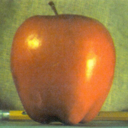

In [5]:
display(Image.open('apple.jpg').resize((128,128)))

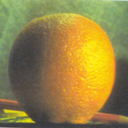

In [6]:
display(Image.open('orange.jpg').resize((128,128)))

In [27]:
import cv2 as cv
import numpy as np,sys
A = cv.imread('apple.jpg')
B = cv.imread('orange.jpg')
print(A.shape)
print(B.shape)
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
# image with direct connecting each half
cv.imwrite('Pyramid_blending2.jpg',ls_)

(512, 512, 3)
(512, 512, 3)


True

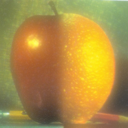

In [14]:
display(Image.open('Pyramid_blending2.jpg').resize((128,128)))

In [10]:
!wget https://surfertas.github.io/static/img/posts/eye.png
!wget https://surfertas.github.io/static/img/posts/mask.png
!wget https://surfertas.github.io/static/img/posts/hand.png

--2021-06-07 17:47:52--  https://surfertas.github.io/static/img/posts/eye.png
Resolving surfertas.github.io (surfertas.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to surfertas.github.io (surfertas.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352991 (345K) [image/png]
Saving to: ‘eye.png’

eye.png             100%[===================>] 344.72K  --.-KB/s    in 0.008s  

2021-06-07 17:47:52 (39.6 MB/s) - ‘eye.png’ saved [352991/352991]

--2021-06-07 17:47:52--  https://surfertas.github.io/static/img/posts/mask.png
Resolving surfertas.github.io (surfertas.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to surfertas.github.io (surfertas.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23812 (23K) [image/png]
Saving to: ‘mask.png’

mask.png            100%[===================>]  23.25K  --.-KB/s    in 0s      

2021-06

# Image Blending with Mask

In general, we can have an arbirtary mask and blend two images according to this mask. The procedure is the following:

1. Construct laplacian pyramids for 2 images that you want to blend
2. Construct gaussian pyramid for a mask
3. Compute weighted sum for each level of the pyramid
$$
L = L_1 \alpha + L_2 (1 - \alpha)
$$

4. Reconstruct the image from the blended pyramid

You should obtain the following result.

In [28]:
Image.open('eye.png').resize((512,512)).save('eye.jpg')
Image.open('hand.png').resize((512,512)).save('hand.jpg')
Image.open('mask.png').resize((512,512)).save('mask.jpg')

In [47]:
gpC[0].max()

177

In [61]:
import matplotlib.pyplot as plt


In [78]:
import cv2 as cv
import numpy as np,sys
A = cv.imread('eye.jpg')
B = cv.imread('hand.jpg')
C = cv.imread('mask.jpg')
print(A.shape)
print(B.shape)
print(C.shape)
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    print(G.shape)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    print('GE',GE.shape)
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)

G = C.copy()
gpC = [G]
for i in range(5):
    G = cv.pyrDown(G)
    gpC.append(G)
gpC.reverse()

for i in range(len(gpC)):
  print('gpC',gpC[i].shape)
for i in range(len(lpA)):
  print('lpA',lpA[i].shape)
for i in range(len(lpB)):
  print('lpB',lpB[i].shape)

result = []
for i in range(len(gpC)):
  result.append(lpA[i]*gpC[i].astype(float)/255+lpB[i]*(1-gpC[i].astype(float)/255))
# now reconstruct
ls_ = result[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, result[i])
cv.imwrite('Hand_eye.jpg',ls_)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(16, 16, 3)
(8, 8, 3)
GE (32, 32, 3)
GE (64, 64, 3)
GE (128, 128, 3)
GE (256, 256, 3)
GE (512, 512, 3)
gpC (16, 16, 3)
gpC (32, 32, 3)
gpC (64, 64, 3)
gpC (128, 128, 3)
gpC (256, 256, 3)
gpC (512, 512, 3)
lpA (16, 16, 3)
lpA (32, 32, 3)
lpA (64, 64, 3)
lpA (128, 128, 3)
lpA (256, 256, 3)
lpA (512, 512, 3)
lpB (16, 16, 3)
lpB (32, 32, 3)
lpB (64, 64, 3)
lpB (128, 128, 3)
lpB (256, 256, 3)
lpB (512, 512, 3)


True

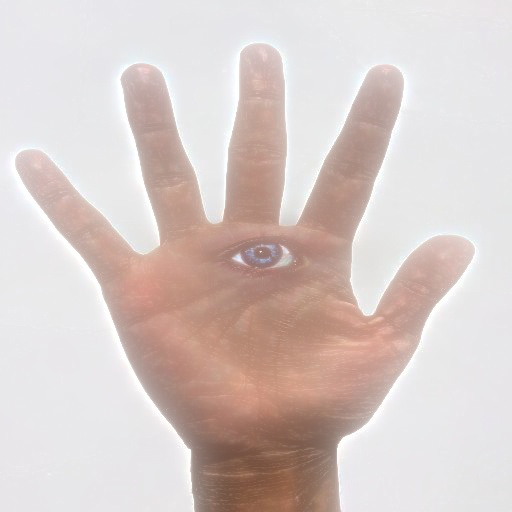

In [79]:
display(Image.open('Hand_eye.jpg'))

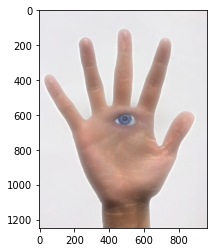

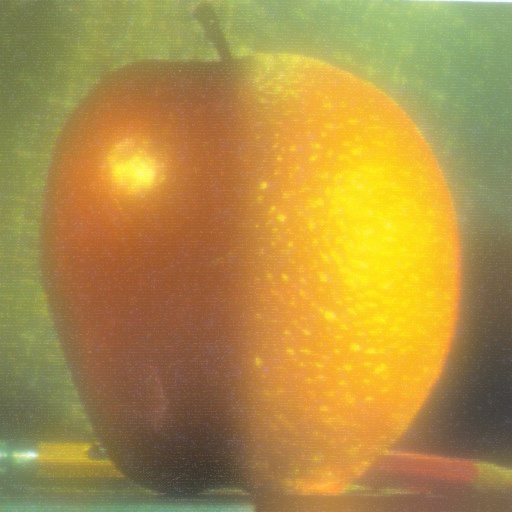

In [ ]:
display(Image.open('Pyramid_blending2.jpg'))

In [ ]:
src1 = cv.imread(cv.samples.findFile('hand.png'))
src2 = cv.imread(cv.samples.findFile('eye.png'))
src3 = cv.imread(cv.samples.findFile('mask.png'))
alpha = 0.5
src2 = src2 * src3
# [blend_images]
beta = (1.0 - alpha)
dst = cv.addWeighted(src1, alpha, src2, beta, 0.0)
# [blend_images]
# [display]
cv.imwrite('dst.png', dst)


True

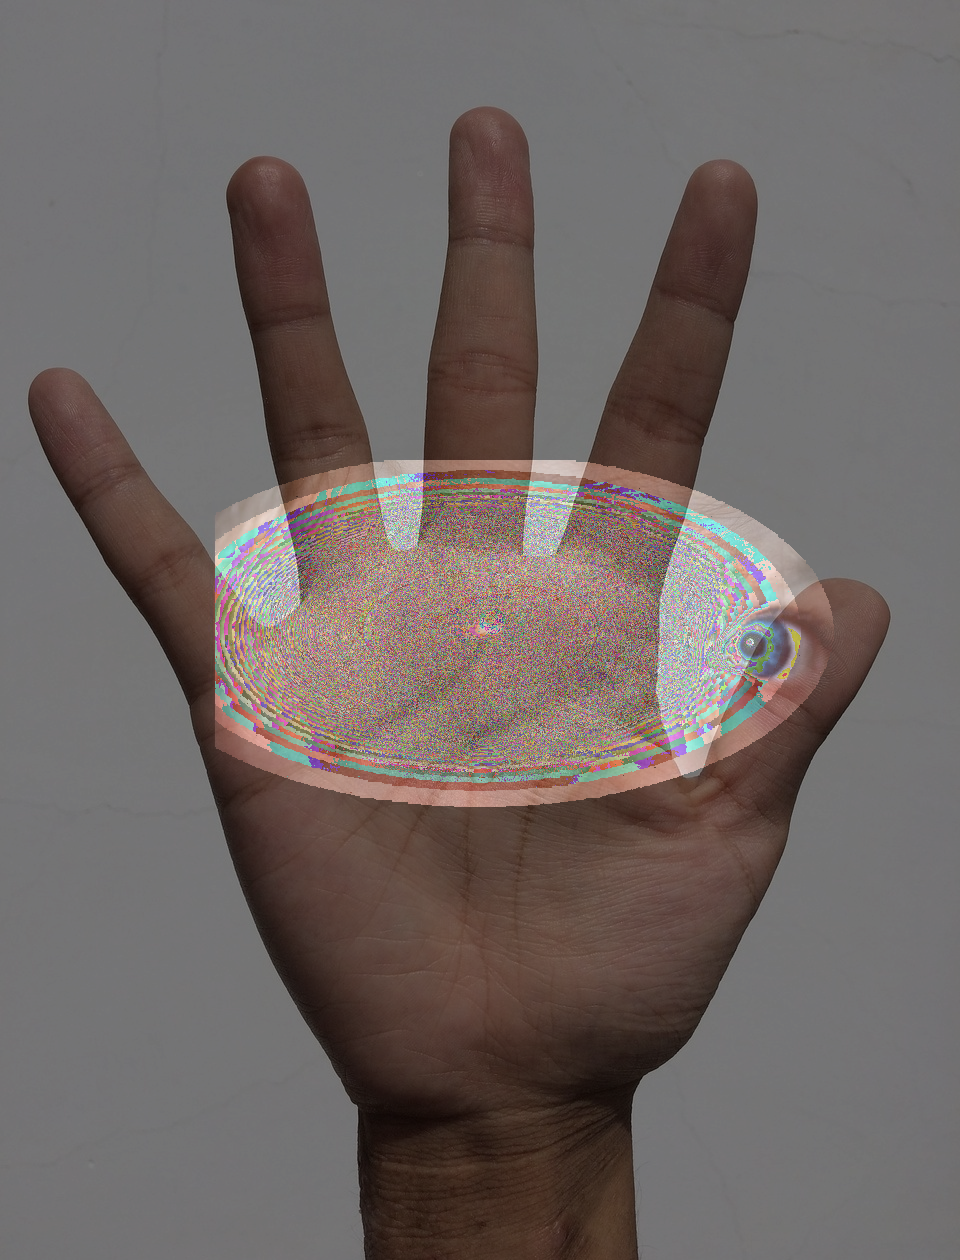

In [ ]:
display(Image.open('dst.png'))